# <font color='blue'>Project: **Face detection in real time**</font>


## <font color='red'>Stage 1. Data preprocessing</font>


In [4]:
# Required libraries.

# Upgrade TensorFlow to the latest version
!pip install --upgrade tensorflow

# For interacting with the operating system
import os
# For numerical operations
import numpy as np
# For creating a dataframe
import pandas as pd
# For creating, reading, writing, and list contents of ZIP files
import zipfile
# For defining classes to work with streams of data
import io
# For reading in images and image manipulation
import cv2
# For visualize.
import matplotlib.pyplot as plt
# For image processing tasks
from PIL import Image
# For uploading the dataset directly from a local machine to Google Colab
from google.colab import files
# Extract the uploaded files
# For label encoding the target variable
from sklearn.preprocessing import LabelEncoder
# For tensor-based operations
from tensorflow.keras.utils import to_categorical, normalize
# For Machine Learning
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
# Fpload the dataset.zip file in a Google Colab notebook
uploaded = files.upload()


# Extract the contents of the uploaded 'dataset.zip' file to the '/content/dataset' directory
with zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r') as zip_ref:
    zip_ref.extractall('/content')

# Update the data_path to the extracted directory
data_path = '/content/dataset'

# Check if the updated data_path exists
if os.path.exists(data_path):
    # List the categories (subdirectories) in the dataset
    categories = os.listdir(data_path)
    # Assign unique labels to each category
    labels = [i for i in range(len(categories))]

    # Create a dictionary mapping categories to their corresponding labels
    label_dict = dict(zip(categories, labels))

    # Print the mapping of categories to labels, the list of categories, and the list of labels
    print('Categories and labels: ', label_dict)
    print('Categories:', categories)
    print('Labels: ', labels)
else:
    print(f"The directory '{data_path}' does not exist.")

Saving dataset.zip to dataset.zip
{'Serhiy': 0, 'Yaroslav': 1, "It's_You": 2, 'Tymur': 3, 'Iryna': 4}
['Serhiy', 'Yaroslav', "It's_You", 'Tymur', 'Iryna']
[0, 1, 2, 3, 4]


In [6]:
#data_path = 'D:/Alexey/Documents/Personal/Education/Selfeducation/face_detection/dataset'


# Load the dataset.
data_path = 'dataset'
# categories = os.listdir(data_path)
# labels = [i for i in range (len(categories))]

# label_dict = dict(zip(categories, labels))

if os.path.exists(data_path):
    categories = os.listdir(data_path)
    labels = [i for i in range(len(categories))]

    label_dict = dict(zip(categories, labels))
    print('All categories and labels:', label_dict, '\n')

    for category, label in label_dict.items():
      print(f'Category: {category}; Label: {label}')
else:
    print(f'The directory {data_path} does not exist.')


All categories and labels: {'Serhiy': 0, 'Yaroslav': 1, "It's_You": 2, 'Tymur': 3, 'Iryna': 4} 

Category: Serhiy; Label: 0
Category: Yaroslav; Label: 1
Category: It's_You; Label: 2
Category: Tymur; Label: 3
Category: Iryna; Label: 4


In [7]:
# Set the desired size for image resizing
img_size = 100

# Initialize empty lists to store data and target labels
data = []
target = []

# Loop through each category (each person's folder) in the dataset
for category in categories:
    # Create the full path to the current category's folder
    folder_path = os.path.join(data_path, category)
    # Get a list of all image names in the current folder
    img_names = os.listdir(folder_path)

    # Loop through each image in the current category's folder
    for img_name in img_names:
        # Create the full path to the current image
        img_path = os.path.join(folder_path, img_name)
        # Read the image using OpenCV
        img = cv2.imread(img_path)

        try:
            # Convert the image into grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Resize the grayscale image to the specified size
            resized = cv2.resize(gray, (img_size, img_size))
            # Append the resized image to the data list
            data.append(resized)
            # Append the corresponding label to the target list
            target.append(label_dict[category])

          # Handle exceptions (e.g., if there is an issue with an image)
        except Exception as exp:
            # Print the exception message and the path of the problematic image
            print(f'Exception: {exp}, Image Path: {img_path}')

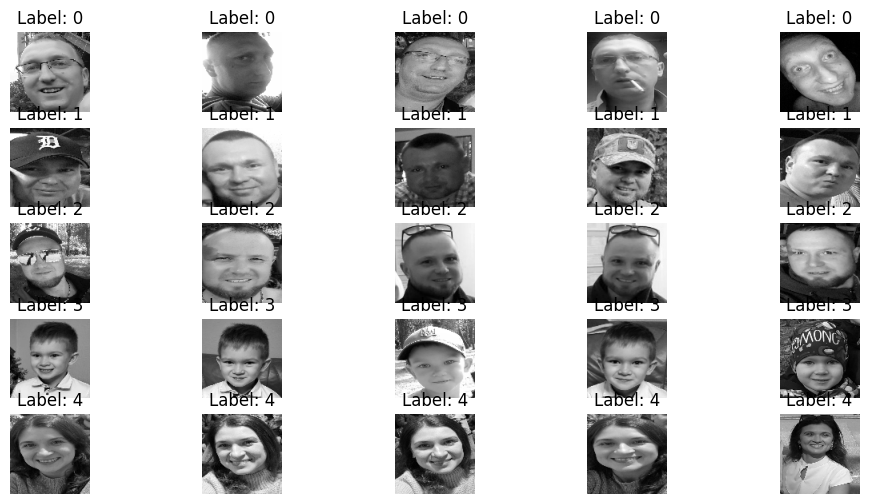

In [17]:
# Convert the list 'data' to a NumPy array
# and normalize pixel values to the range [0, 1]
data = np.array(data) / 255.0

# Reshape the 'data' array to the required format for convolutional neural networks
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))

# Convert the list 'target' to a NumPy array
target = np.array(target)
# Convert categorical labels ('target') to one-hot encoded vectors
new_target = to_categorical(target)


# import matplotlib.pyplot as plt

# Assuming data is already prepared and loaded

# # Function to display images from the dataset
# def display_images(images, labels, num_images=5):
#     fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

#     for i in range(num_images):
#         axes[i].imshow(images[i].reshape(img_size, img_size), cmap='gray')
#         axes[i].set_title(f'Label: {labels[i]}')
#         axes[i].axis('off')

#     plt.show()

# # Display the first 5 images
# display_images(data, target, num_images=5)



# Function to display images from different categories
def display_images(images, labels, categories, num_images_per_category=5):
    # Create a subplot grid
    fig, axes = plt.subplots(len(categories), num_images_per_category, figsize=(12, 6))

    # Iterate over each category
    for i, category in enumerate(categories):
        # Get indices of images belonging to the current category
        category_indices = np.where(labels == label_dict[category])[0]
        # Randomly choose a subset of indices for display
        category_indices = np.random.choice(category_indices,
                                            num_images_per_category,
                                            replace=False)

        # Display each image in the current row
        for j, index in enumerate(category_indices):
            # Show the image
            axes[i, j].imshow(images[index].reshape(img_size, img_size), cmap='gray')
            # Set the title with the label
            axes[i, j].set_title(f'Label: {labels[index]}')
            axes[i, j].axis('off')

    plt.show()

# Display images from different categories (adjust num_images_per_category as needed)
display_images(data, target, categories, num_images_per_category=5)

In [18]:
# Save the preprocessed image data ('data') to a file named 'data.npy'
np.save('data', data)
# Save the one-hot encoded labels ('new_target') to a file named 'target.npy'
np.save('target', new_target)